# Gath - Geva Clustering

In [2]:

import numpy as np

First thing first, let's use the generator tools from previous works

In [53]:
import numpy as np
import matplotlib.pyplot as plt


def get_random_covariance(d):
    """
    Function to generate a random, valid covariance matrix of size d x d
    """
    sigma = np.random.rand(d, d) - 0.5
    sigma = np.dot(sigma, sigma.T)  # make the matrix symmetric
    return sigma


def get_random_gaussian_dist(d, distance=5):
    """
     generate a random Gaussian distribution with mean mu and covariance matrix sigma
    The distance parameter specifies the distance of the mean from the origin
    """
    sigma = get_random_covariance(d)  # generate a random covariance matrix
    mu = np.array(np.random.rand(d)) * distance  # generate a random mean
    return mu, sigma


def generate_normal_datapoint(guaussian_dist):
    """
     generate a single datapoint from a Gaussian distribution with mean and covariance matrix guaussian_dist
    """
    mean = guaussian_dist[0]
    cov = guaussian_dist[1]
    dp = np.random.multivariate_normal(mean, cov, check_valid='warn', tol=1e-8)
    return dp


def generate_gaussian_cluster(guaussian_dist, k,d = 2, dataset=None):
    """
    Function to generate a cluster of k datapoints from the Gaussian distribution guaussian_dist
    The dataset parameter can be used to append the generated cluster to an existing dataset
    gauss_dist is a tuple of the form (mean, covariance matrix)
    """
    cluster = np.empty((0, d))  # initialize an empty array to store the datapoints
    for i in range(k):
        p = generate_normal_datapoint(guaussian_dist)  # generate a single datapoint
        cluster = np.append(cluster, [p], axis=0)  # add the datapoint to the cluster
    if dataset:
        dataset = np.append(dataset, cluster)  # append the cluster to an existing dataset, if provided
    return cluster
def generate_clusters(n,k,d):
    colors =[]
    clusters = []
    # for k clusters:
    for i in range (k):
        cluster = generate_gaussian_cluster(get_random_gaussian_dist(d),n[i],d = d)
        clusters.append([cluster])
        #colors.append(np.random.uniform(0,1)/4+3*k/4)
    return clusters


def plot_loss(loss):
    plt.figure()
    plt.plot(range(len(loss)),loss)
    plt.title("loss vs. iteration no.")
    plt.xlabel("iteration")
    plt.ylabel("|loss|")
    plt.show()

def get_rand_centroids(K,d):
    centroids = np.random.rand(K, d)
    return centroids

# Classical fuzzy clustering: FCM
Fuzzy C-means (FCM) is a clustering algorithm that is used to partition data points $\{x_i\}_1^n$ into a predefined number of clusters $c$. The algorithm is a 'soft' clustering method, which allows each data point to belong to multiple clusters to a certain degree.

The FCM algorithm can be summarized as follows:

1. Initialize the cluster centers.
2. Calculate the membership degrees of each data point to each cluster.
$$ p(w_j|x_i) \leftarrow
    \frac
        {({\frac{1}{d_{ij} ^2 })^{1/b-1}}}
        {\sum_{i=1}^N({\frac{1}{d_{ij} ^2 })^{1/b-1}}}
        $$


3. Update the cluster centers based on the membership degrees.
$$\mu_{cx} \leftarrow \frac{
        \sum_{i=1}^N \hat p(w_i|x_j)^b \cdot x_j}
    {
        \sum_{i=1}^N \hat p(w_i|x_j)^b }$$

Repeat steps 2-3 until the cluster centers converge.


where $d_{ij} = d(x_i,c_j)$ is the distance between the data point $x$ and the cluster center $c_i$, $b$ is a fuzzifier parameter, and $C$ is the number of clusters.

The FCM algorithm is a versatile clustering algorithm that can be used to cluster data of different types. It is also relatively robust to noise and outliers.



In [31]:
import numpy as np

def fcm(data, K, initial_centroids, max_iters = 50, fuzziness = 2, tol = 0.001):
    # Randomly initialize cluster centers
    centroids = initial_centroids
    i=0
    converged = False
    iteration_loss = []
    while (not converged) and i < max_iters:
        # Calculate the membership matrix
        distances = np.linalg.norm(data[:, None] - centroids, axis=2)
        membership = 1 / (distances ** (2 / (fuzziness - 1)))
        membership = membership / np.sum(membership, axis=1)[:, None]

        # Update cluster centers
        m = membership ** fuzziness
        centroids = np.dot(m.T, data) / np.sum(m, axis=0)[:, None]

        if i<4 or not i%10 :
            plt.figure()
            c = np.argmax(membership,axis=1)
            plt.scatter(data[:,0], data[:, 1],  c=c,alpha=0.5)
            plt.title(f'iteration {i}')

        loss = np.sum((distances**2) * m)
        iteration_loss.append(loss)

        if i >20:
            converged = (abs(loss-iteration_loss[i-1]) < tol)
            print(loss-iteration_loss[i-1])
        i+=1

    return centroids, membership, iteration_loss

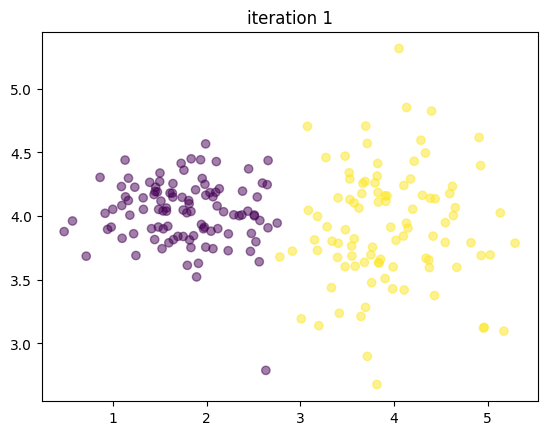

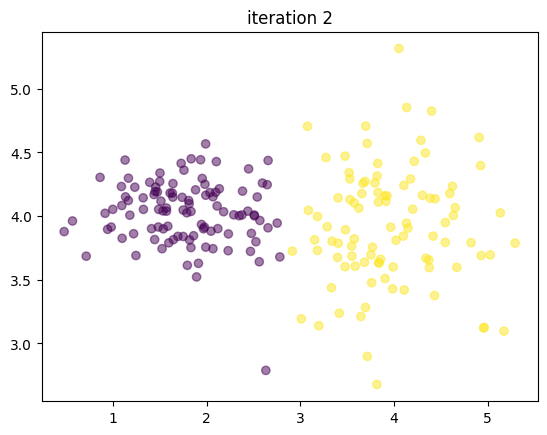

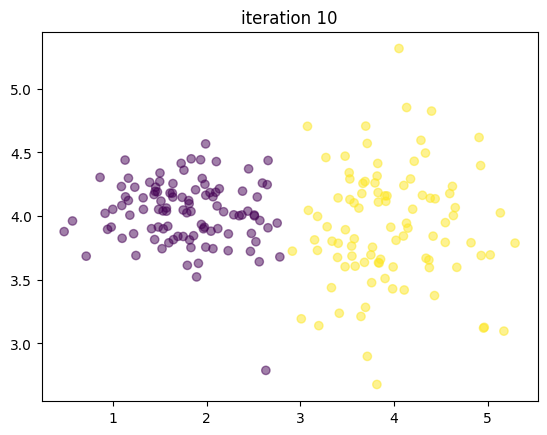

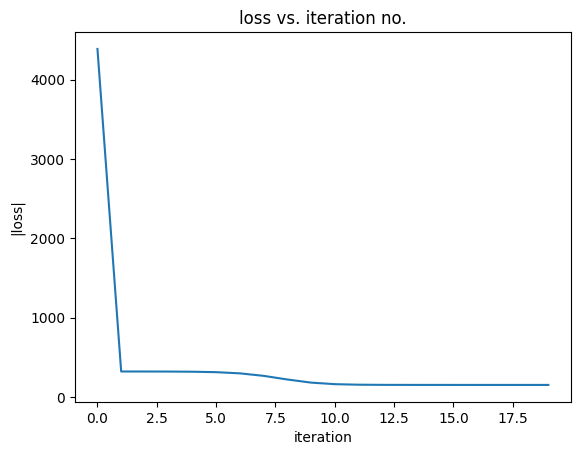

In [5]:

K = 2
max_iters = 50
fuzziness = 2


# Example usage
cluster_0 = generate_gaussian_cluster(get_random_gaussian_dist(2),100)
cluster_1 = generate_gaussian_cluster(get_random_gaussian_dist(2),100)

# unify data
data = np.concatenate((cluster_0,cluster_1))

# initialize random centroids
centroids = np.random.rand(K, data.shape[1])

centroids, membership, loss = fcm(data, K, centroids,max_iters = max_iters, fuzziness = fuzziness)
plot_loss(loss)




In [6]:
def get_gaussian_line_shape_distribution(p1,p2):
    v = p2 - p1
    v_norm = np.linalg.norm(v)
    u = v/v_norm

    sigma = v_norm * np.outer(u,u)

    epsilon = 0.005 * np.identity(sigma.shape[0])
    sigma +=epsilon

    mu = p1 + (p2 - p1)/2

    return mu, sigma



## generate the data

In [34]:

K = 3
max_iters = 50
fuzziness = 2

clusters = []
# Example usage
clusters.append( generate_gaussian_cluster(get_random_gaussian_dist(2),50))
clusters.append( generate_gaussian_cluster(get_random_gaussian_dist(2),100))
clusters.append( generate_gaussian_cluster(get_random_gaussian_dist(2),200))

# unify data
data = np.concatenate(clusters)

## plot the data

In [35]:
def plot_clusters(clusters):
    plt.figure()

    for c in clusters:
        plt.scatter(c[:,0], c[:, 1], alpha=0.5)


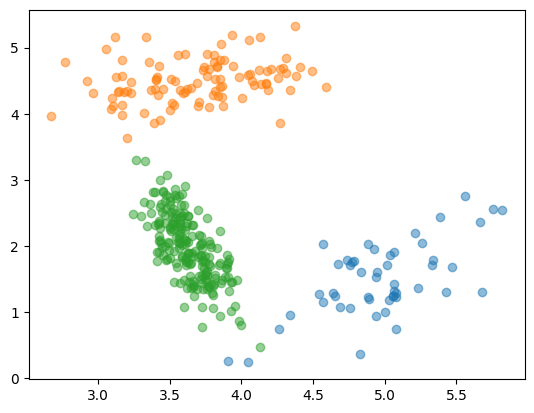

In [37]:
plot_clusters(clusters)

-0.3863242153129107
-0.39074853537245247
-0.3635920596200606
-0.30326206027820035
-0.22401883096829067
-0.14712221682333393
-0.0872712508557072
-0.04775245672342976
-0.024601326453051797
-0.012138697482100724
-0.005811345550881697
-0.002724906392018056
-0.0012596890234704006
-0.0005767573485684352


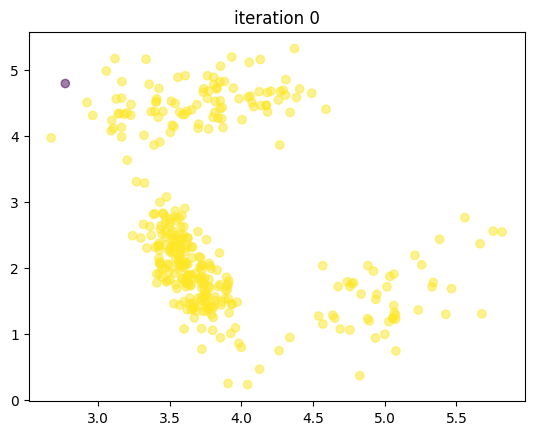

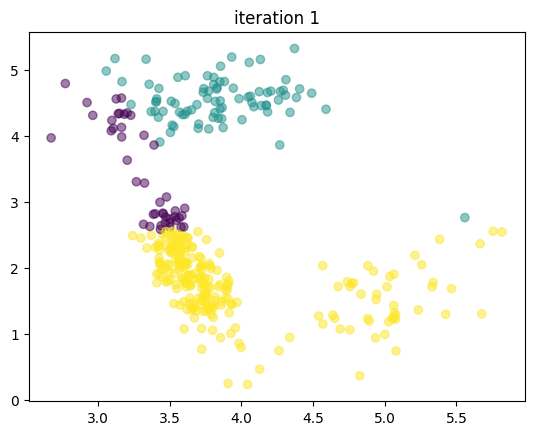

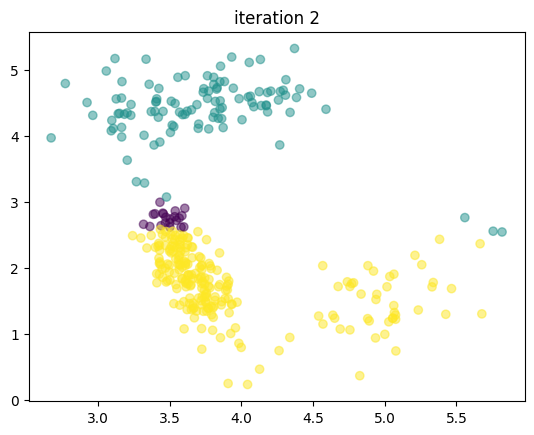

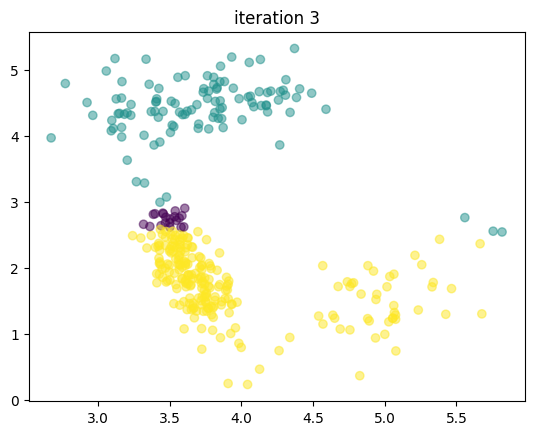

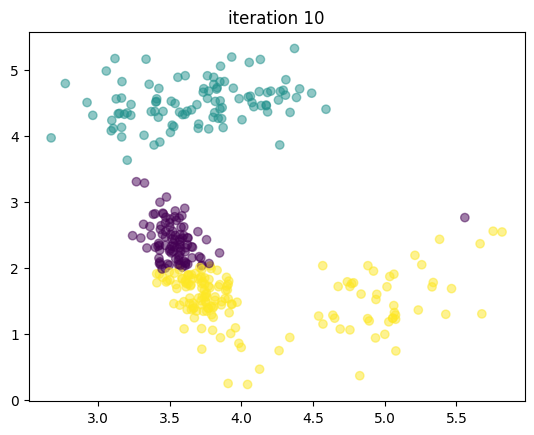

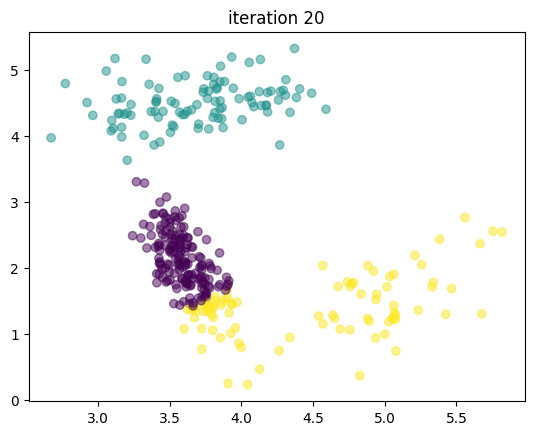

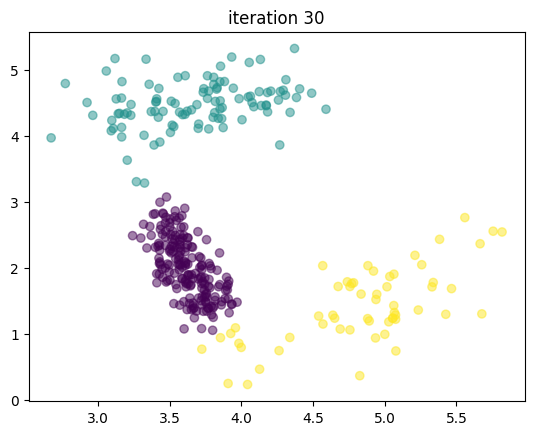

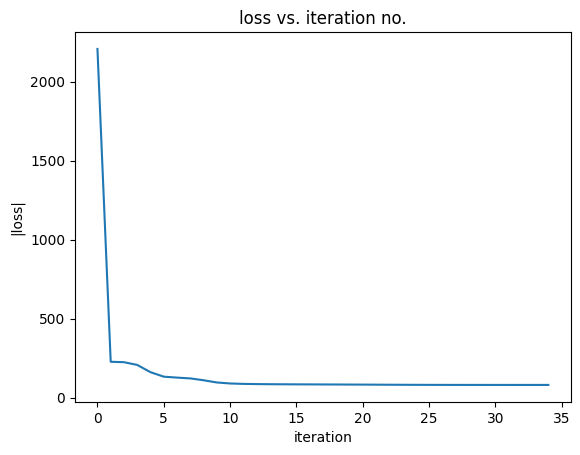

In [36]:
# initialize random centroids
centroids = np.random.rand(K, data.shape[1])

centroids, membership, loss = fcm(data, K, centroids,max_iters = max_iters, fuzziness = fuzziness)
plot_loss(loss)


In [55]:
K = 3
d = 2
max_iters = 50
fuzziness = 2

clusters = []
# Example usage
for _ in range(K):
    clusters.append(generate_gaussian_cluster(get_random_gaussian_dist(d),50*np.random.randint(1,4)))

# unify data
data = np.concatenate(clusters)

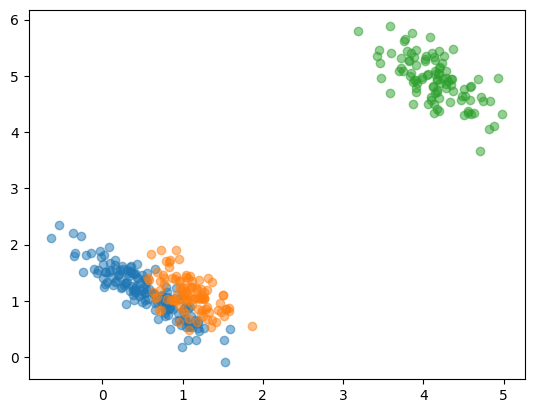

In [56]:
plot_clusters(clusters)

-2.3234747459355276e-11


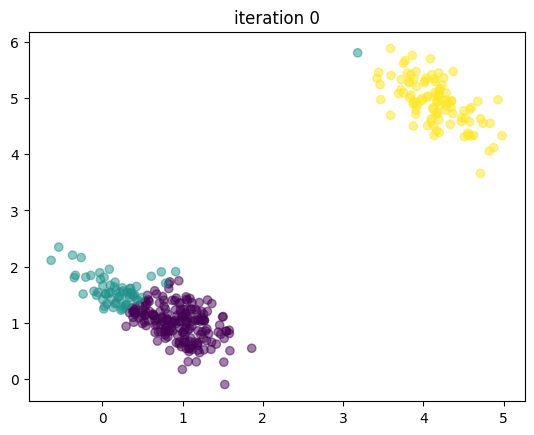

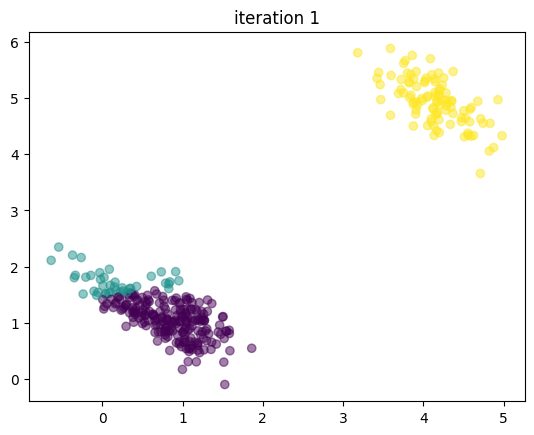

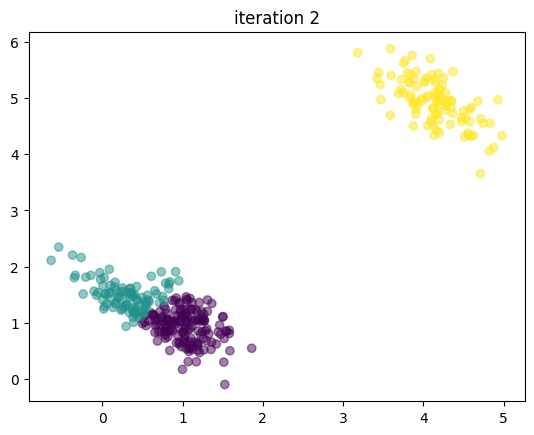

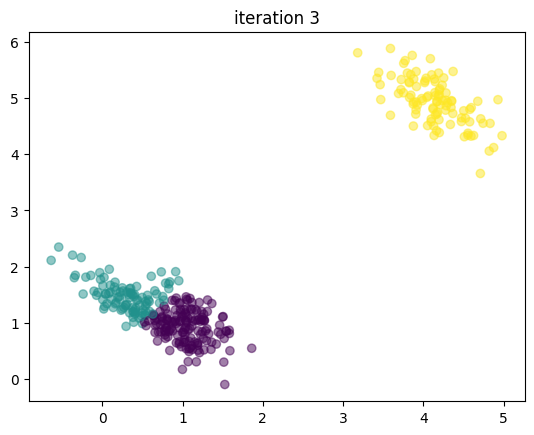

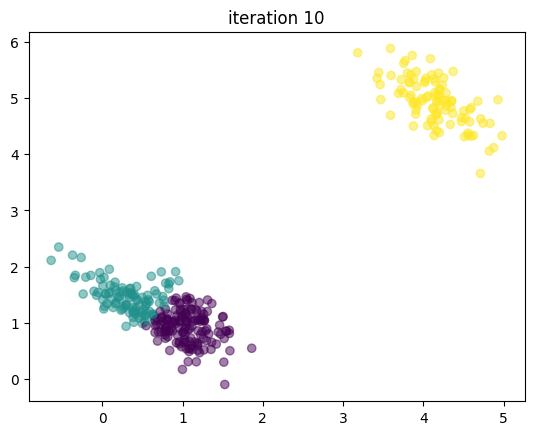

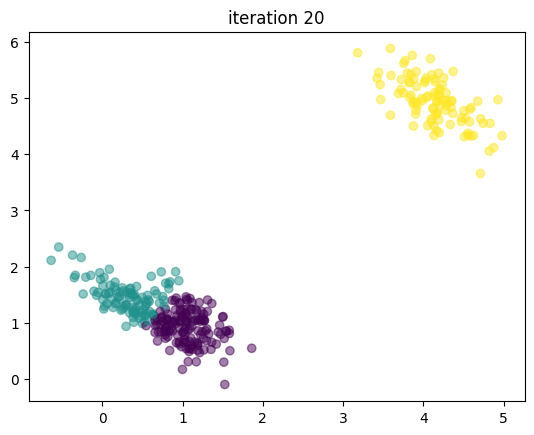

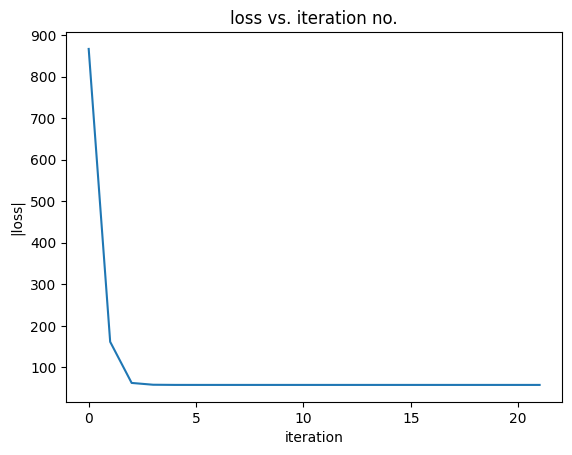

In [57]:
K =3
centroids, membership, loss = fcm(data, K, centroids,max_iters = max_iters, fuzziness = fuzziness)
plot_loss(loss)

-5.6772364587232005e-12


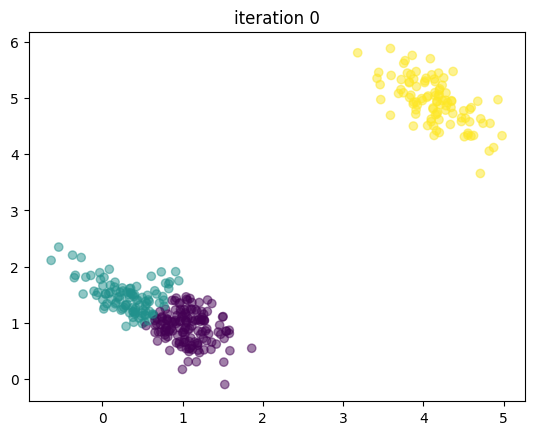

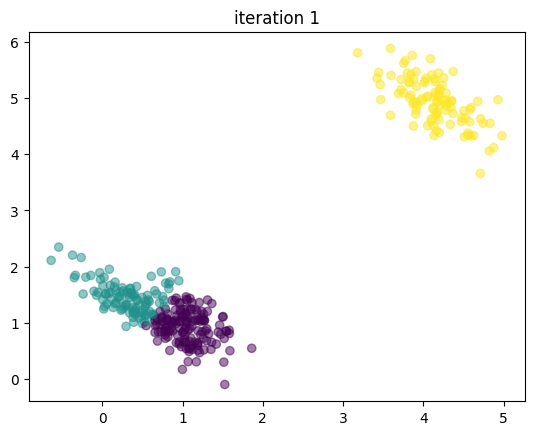

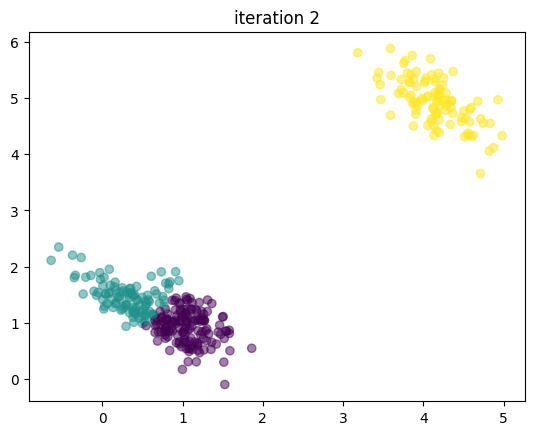

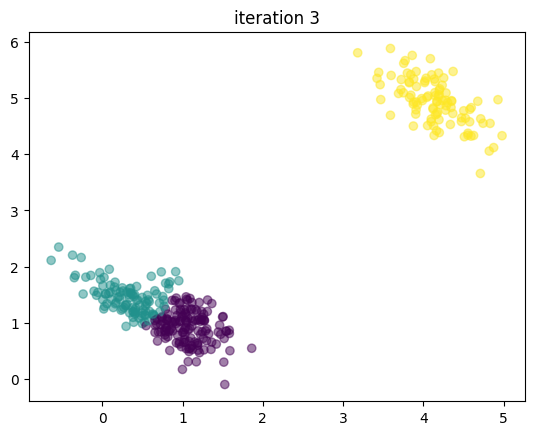

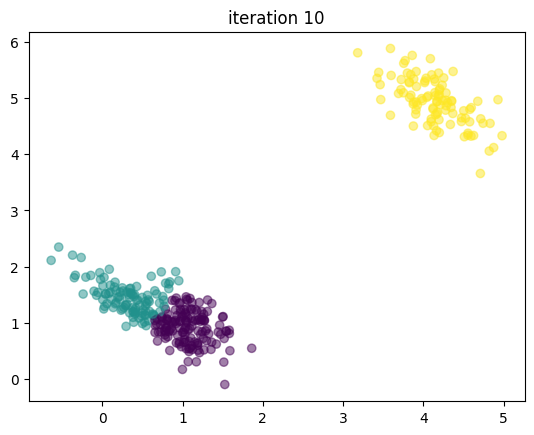

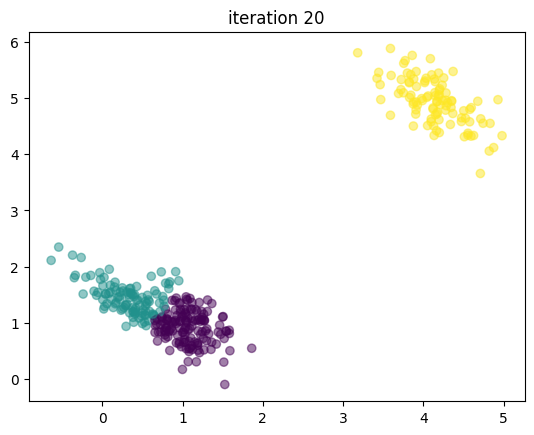

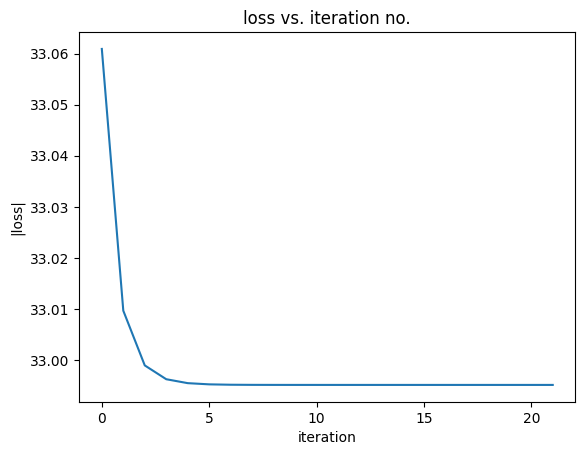

In [58]:
fuzziness = 3
centroids, membership, loss = fcm(data, K, centroids,max_iters = max_iters, fuzziness = fuzziness)
plot_loss(loss)

-6.389555551322701e-11


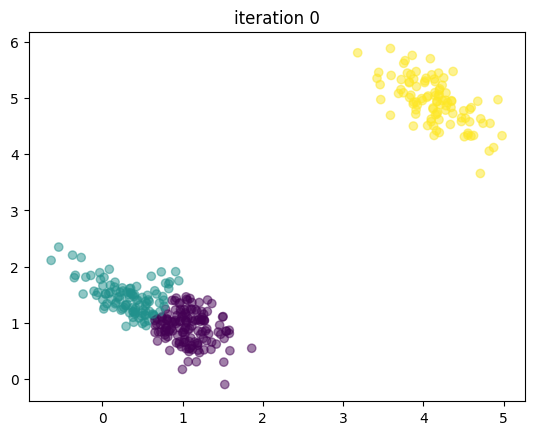

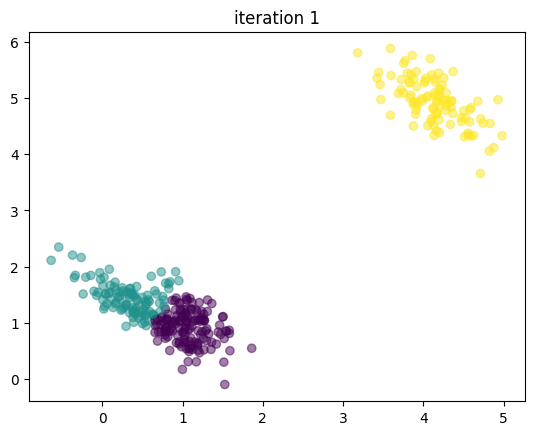

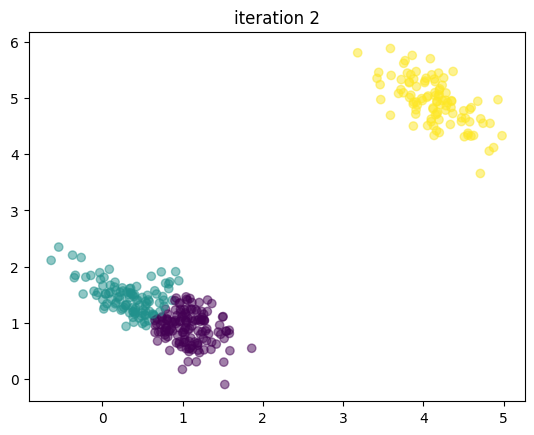

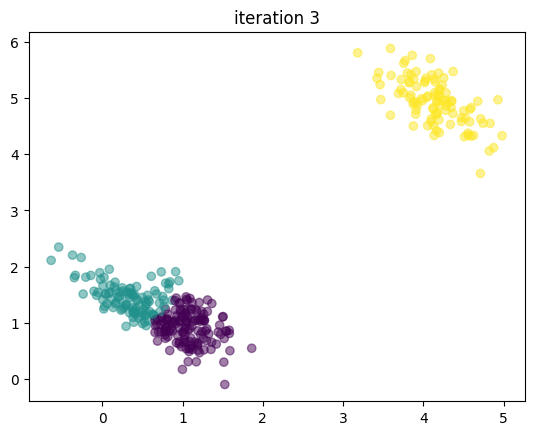

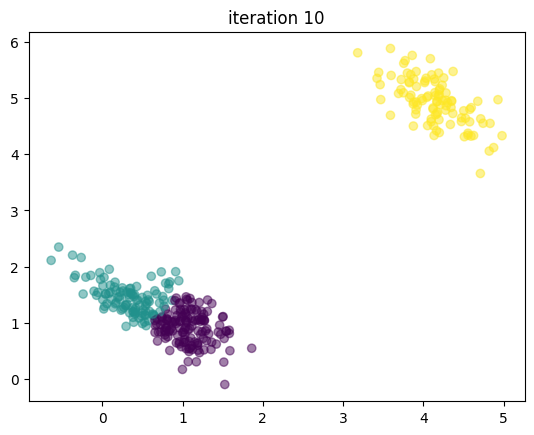

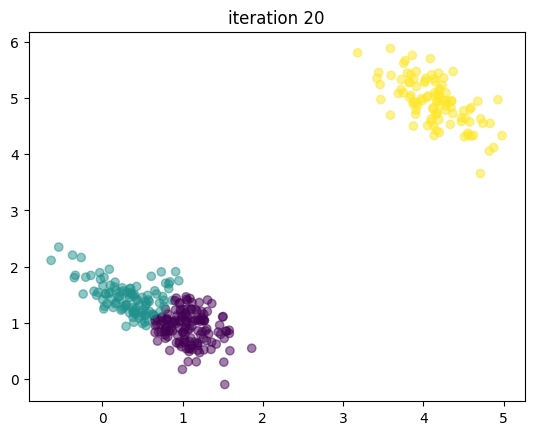

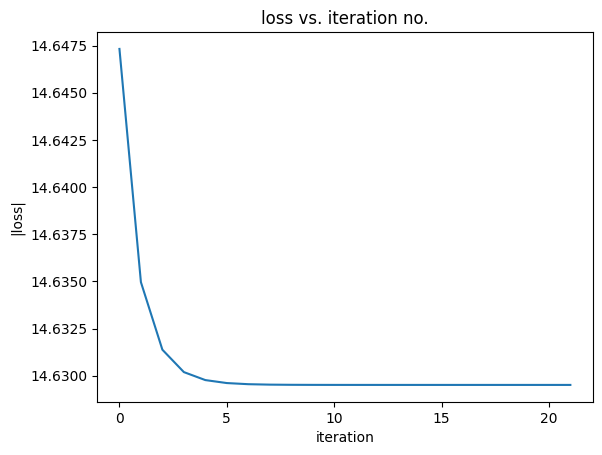

In [59]:
fuzziness = 4
centroids, membership, loss = fcm(data, K, centroids,max_iters = max_iters, fuzziness = fuzziness)
plot_loss(loss)

## Generate Data


In [60]:
## Generate Data

In [68]:
K = 10
max_iters = 50
fuzziness = 6

clusters = []
# Example usage
for _ in range(K):
    clusters.append(generate_gaussian_cluster(get_random_gaussian_dist(2),50*np.random.randint(1,4)))


# unify data
data = np.concatenate(clusters)

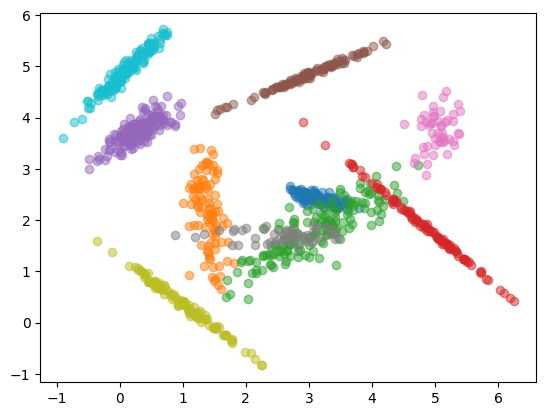

In [69]:
plot_clusters(clusters)

-0.0005069903435810375


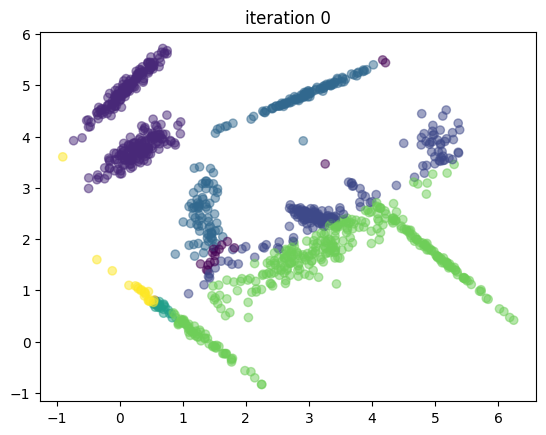

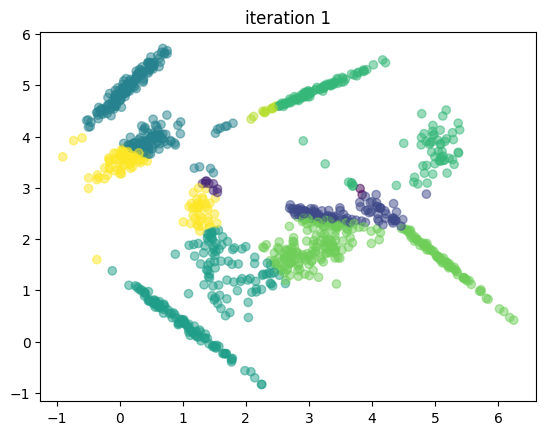

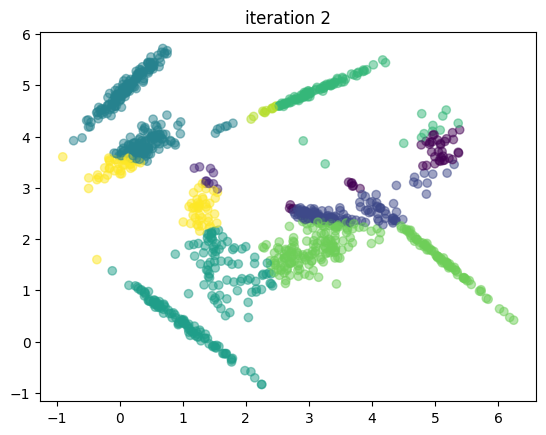

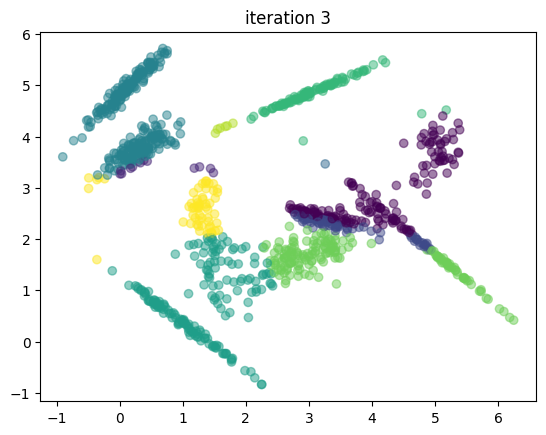

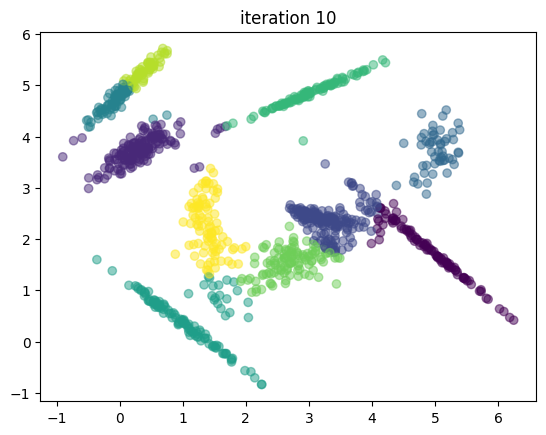

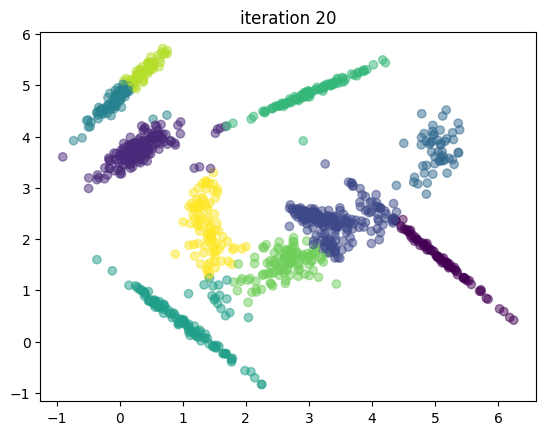

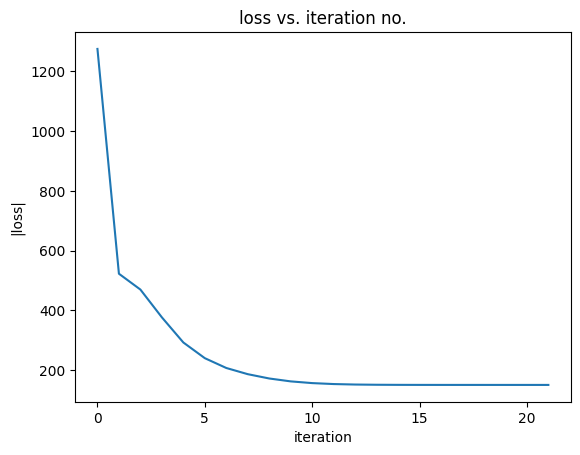

In [70]:
fuzziness = 2
centroids, membership, loss = fcm(data, K, get_rand_centroids(K,d),max_iters = max_iters, fuzziness = fuzziness)
plot_loss(loss)

-0.1052030102394248
-0.09949835803684337
-0.09495865927077318
-0.08980476595230158
-0.07496899689637715
-0.059977950536406865
-0.0505961269341384
-0.04387619049967739
-0.037434494833213705
-0.03269619636565224
-0.03073092161243096
-0.03140870931618167
-0.03659152213615968
-0.04581869372213987
-0.05742111225915636
-0.06560895256593469
-0.05583494549330936
-0.03517843884810645
-0.022314577609151343
-0.013481257472435004
-0.007500070255311186
-0.004045127813579796
-0.002199075606640122
-0.001225667254061591
-0.0007033731321293146


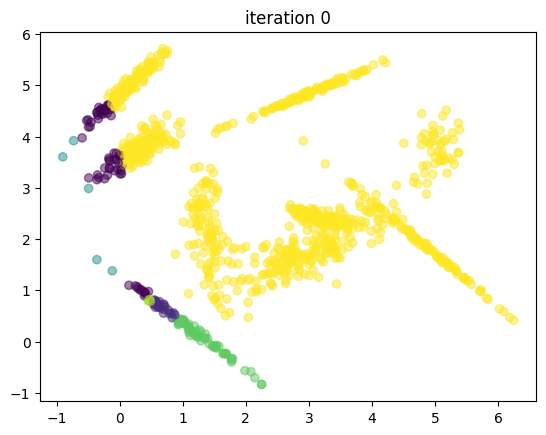

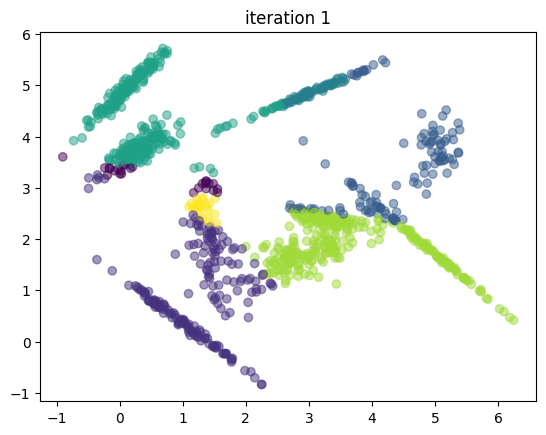

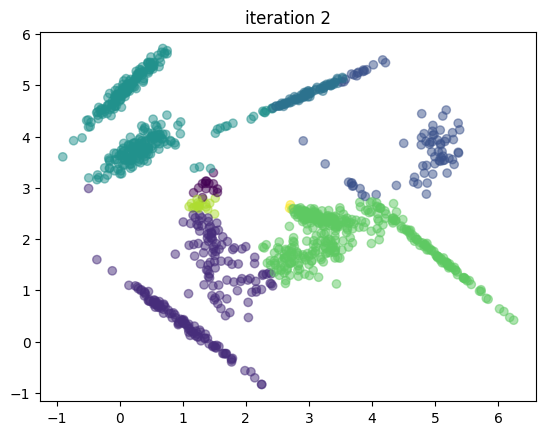

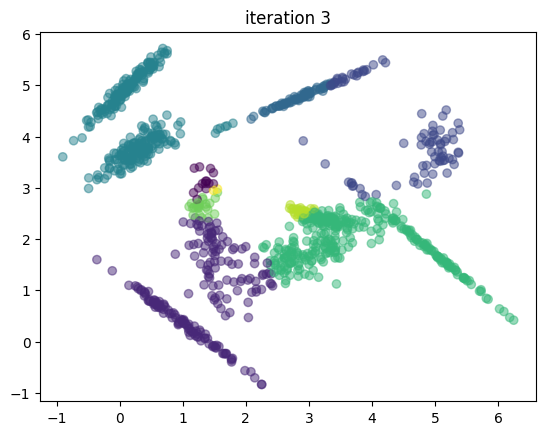

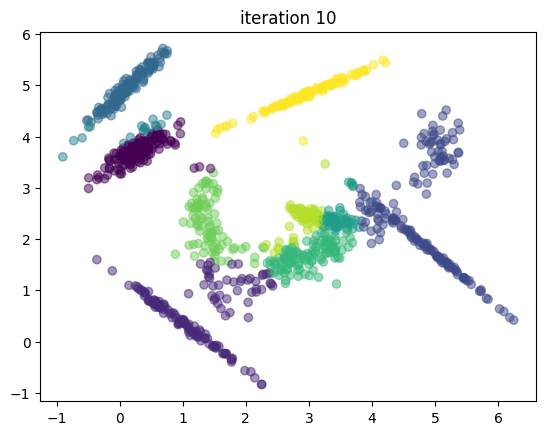

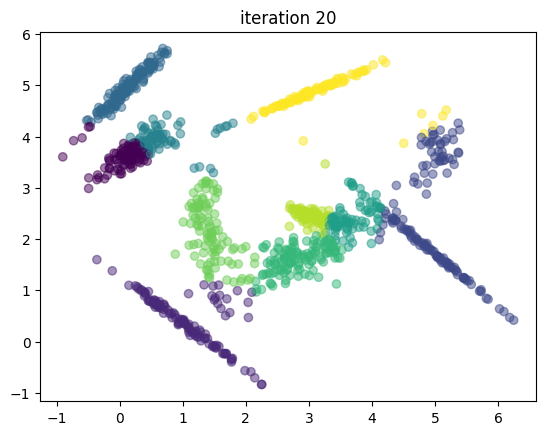

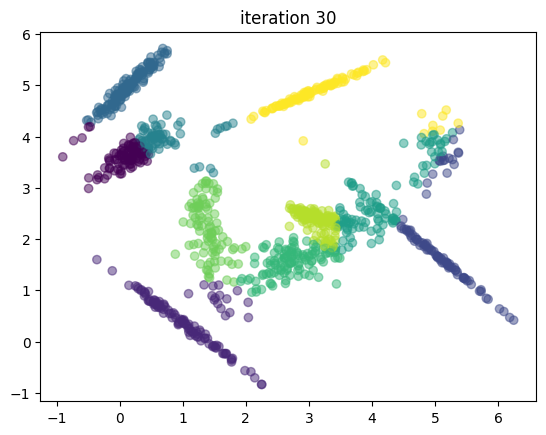

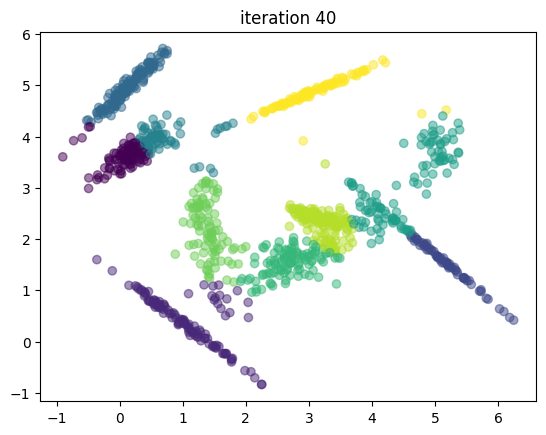

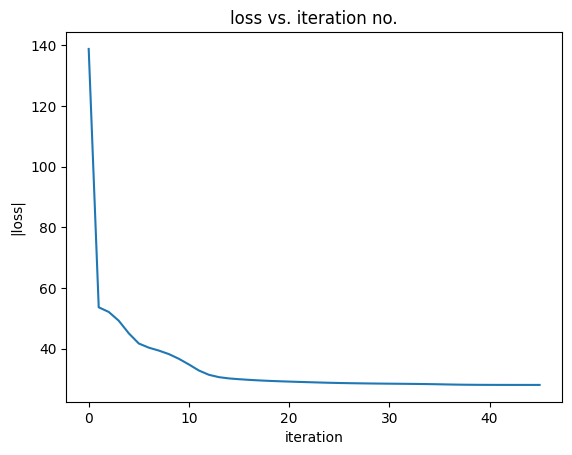

In [71]:
fuzziness = 3
centroids, membership, loss = fcm(data, K, get_rand_centroids(K,d),max_iters = max_iters, fuzziness = fuzziness)
plot_loss(loss)

-2.068140638374896e-07


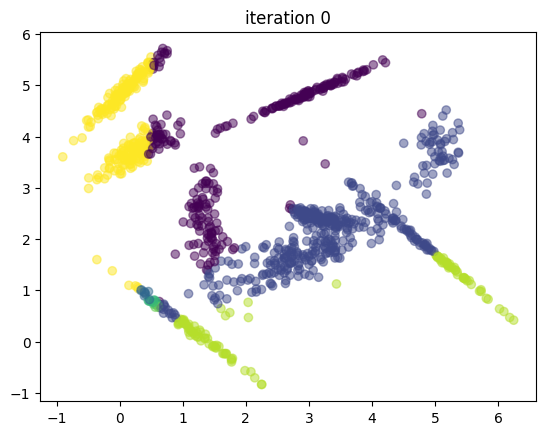

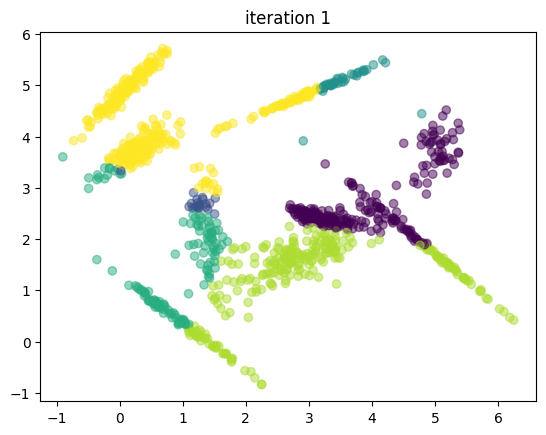

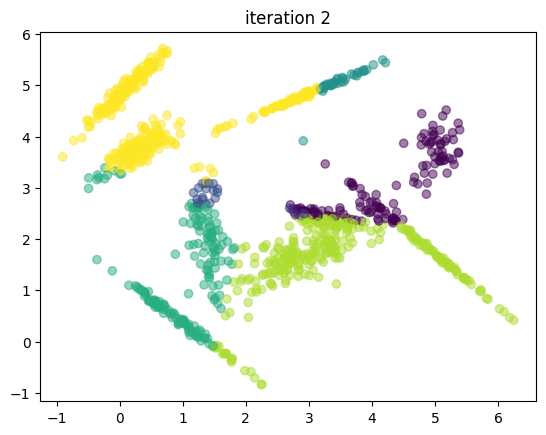

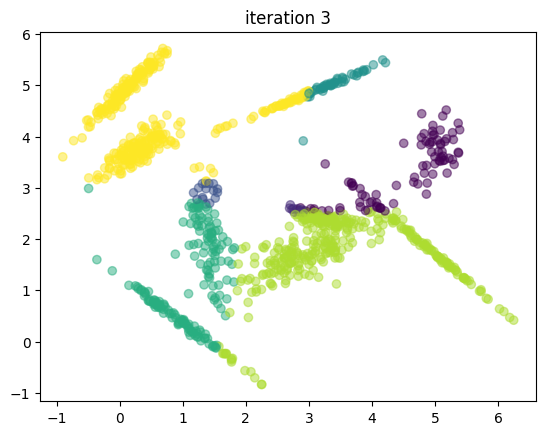

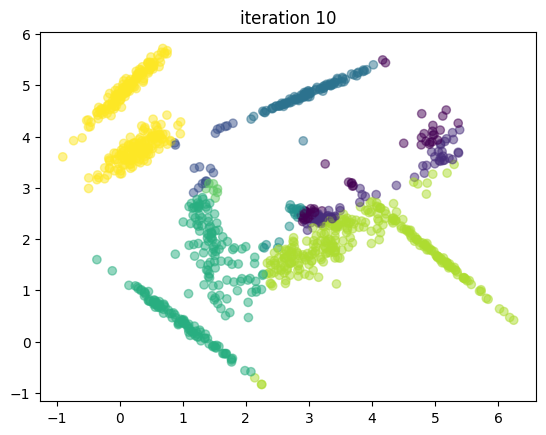

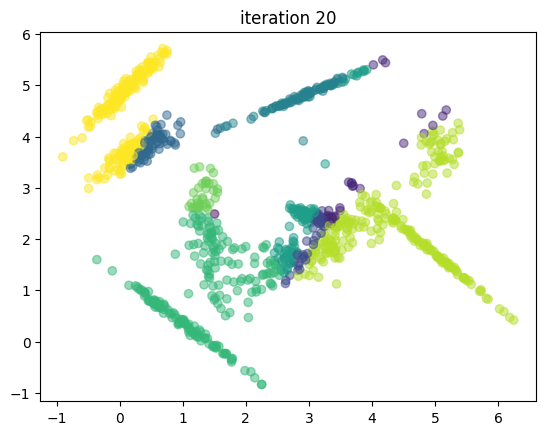

In [72]:
fuzziness = 8
centroids, membership, loss = fcm(data, K, get_rand_centroids(K,d),max_iters = max_iters, fuzziness = fuzziness)
plot_loss(loss)